# My Spotify data

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 413.1 kB/s eta 0:00:00a 0:00:01


In [127]:
def barTopArtist(df_top_artist,xlabel=' ',ylabel=' '):
    top_artist_x = df_top_artist.values
    top_artist_y = df_top_artist.index
    sns.barplot(x=top_artist_x, y=top_artist_y, palette='viridis')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

def msToHours(df_spotify):
    start_date = df_spotify['endTime'].min()
    end_date = df_spotify['endTime'].max()
    total_ms = df_spotify['msPlayed'].sum()
    total_hora = (((total_ms / 1000) / 60) / 60)
    print("{} ate {}".format(start_date,end_date))
    print("{:.2f} horas".format(total_hora))

In [4]:
streming_data0 = pd.read_json("datasets/StreamingHistory0.json")
streming_data1 = pd.read_json("datasets/StreamingHistory1.json")
streming_data2 = pd.read_json("datasets/StreamingHistory2.json")
streming_data3 = pd.read_json("datasets/StreamingHistory3.json")
streming_data4 = pd.read_json("datasets/StreamingHistory4.json")
streming_data5 = pd.read_json("datasets/StreamingHistory5.json")

lista_data_stream = [streming_data0,streming_data1,streming_data2,streming_data3,streming_data4,streming_data5]

full_data_streaming = pd.concat(lista_data_stream, ignore_index=True) 


full_data_streaming.head()

,endTime,artistName,trackName,msPlayed
0,2022-08-28 15:20,boy pablo,Feeling Lonely,30122
1,2022-08-28 15:23,Twenty One Pilots,Good Day,204400
2,2022-08-28 15:24,Gym Class Heroes,Cupid's Chokehold / Breakfast in America - Rad...,20498
3,2022-08-28 15:27,Twenty One Pilots,Choker,223065
4,2022-08-28 15:30,Twenty One Pilots,Shy Away,175044


In [95]:
full_data_streaming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57941 entries, 0 to 57940
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   endTime     57941 non-null  datetime64[ns]
 1   artistName  57941 non-null  object        
 2   trackName   57941 non-null  object        
 3   msPlayed    57941 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.8+ MB


In [7]:
full_data_streaming.describe()

,msPlayed
count,5.794100e+04
mean,1.077149e+05
std,1.088558e+05
min,0.000000e+00
25%,1.470000e+03
50%,9.298400e+04
75%,2.008000e+05
max,3.792692e+06


In [52]:
top_artist = full_data_streaming['artistName'].value_counts().head(5)
top_artist.head()

artistName
Twenty One Pilots    2646
The Killers          2278
Gorillaz             1518
The Beatles          1209
Yago Oproprio        1079
Name: count, dtype: int64

In [63]:
full_data_streaming['endTime'] = pd.to_datetime(full_data_streaming['endTime'])
full_data_streaming.head()

,endTime,artistName,trackName,msPlayed
0,2022-08-28 15:20:00,boy pablo,Feeling Lonely,30122
1,2022-08-28 15:23:00,Twenty One Pilots,Good Day,204400
2,2022-08-28 15:24:00,Gym Class Heroes,Cupid's Chokehold / Breakfast in America - Rad...,20498
3,2022-08-28 15:27:00,Twenty One Pilots,Choker,223065
4,2022-08-28 15:30:00,Twenty One Pilots,Shy Away,175044


In [122]:
msToHours(full_data_streaming)

2022-08-28 15:20:00 ate 2023-08-29 23:58:00
1733.64 horas


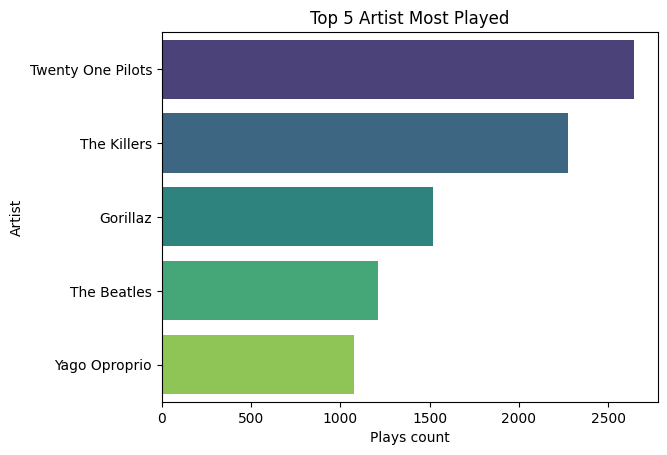

In [108]:
barTopArtist(top_artist)

<Axes: ylabel='trackName'>

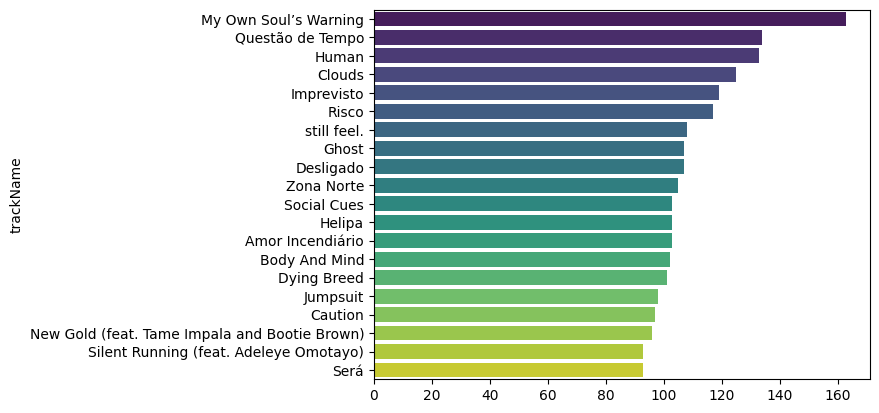

In [72]:
sns.barplot(x=most_played_songs.values, y=most_played_songs.index, palette='viridis')

In [94]:
ghost = full_data_streaming[full_data_streaming['trackName'] == 'Ghost']
full_ms = ghost['msPlayed'].sum()
full_horas_ghost = ((full_ms/1000)/60)
print(full_ms)
ghost.head()

11826839


,endTime,artistName,trackName,msPlayed
2961,2022-09-12 19:18:00,Confetti,Ghost,0
2963,2022-09-12 19:25:00,Confetti,Ghost,169413
3037,2022-09-13 17:46:00,Confetti,Ghost,169413
3271,2022-09-14 16:53:00,Confetti,Ghost,169413
3467,2022-09-15 10:46:00,Confetti,Ghost,169413


In [71]:
most_played_songs = full_data_streaming['trackName'].value_counts().head(20)
most_played_songs

trackName
My Own Soul’s Warning                            163
Questão de Tempo                                 134
Human                                            133
Clouds                                           125
Imprevisto                                       119
Risco                                            117
still feel.                                      108
Ghost                                            107
Desligado                                        107
Zona Norte                                       105
Social Cues                                      103
Helipa                                           103
Amor Incendiário                                 103
Body And Mind                                    102
Dying Breed                                      101
Jumpsuit                                          98
Caution                                           97
New Gold (feat. Tame Impala and Bootie Brown)     96
Silent Running (feat. Adeleye Omotay

In [99]:
data_2023 = full_data_streaming[full_data_streaming['endTime'] > '2023-01-01']
data_2023.head()

,endTime,artistName,trackName,msPlayed
17750,2023-01-02 13:59:00,Gorillaz,Clint Eastwood,21331
17751,2023-01-02 13:59:00,Selvagens à Procura de Lei,Sentinelas,152705
17752,2023-01-02 14:03:00,Selvagens à Procura de Lei,Tarde Livre,225720
17753,2023-01-02 14:09:00,Red Hot Chili Peppers,Snow (Hey Oh),334666
17754,2023-01-02 14:11:00,Selvagens à Procura de Lei,Sentinelas,152705


In [100]:
most_played_songs_2023 = data_2023['trackName'].value_counts()
most_played_songs_2023.head()

trackName
Questão de Tempo    134
Imprevisto          119
Desligado           107
Zona Norte          104
Helipa              103
Name: count, dtype: int64

In [112]:
top_artist_2023 = data_2023['artistName'].value_counts().head(10)
top_artist_2023.head(10)

artistName
Twenty One Pilots        2208
Gorillaz                 1295
The Beatles              1085
Yago Oproprio            1079
The Killers              1016
Cage The Elephant         646
Red Hot Chili Peppers     388
System Of A Down          377
Lagum                     369
Eminem                    334
Name: count, dtype: int64

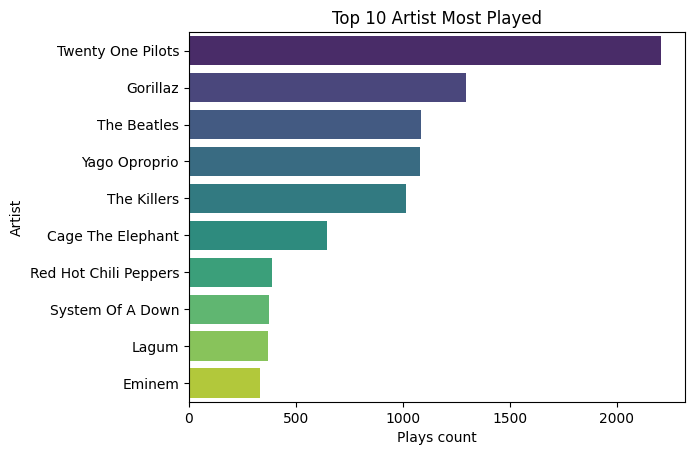

In [123]:
barTopArtist(top_artist_2023)

In [118]:
trapdoor_2023 = data_2023[data_2023['trackName'] == 'Trapdoor']
trapdoor_plays = trapdoor_2023.count()
print(trapdoor_plays)

endTime       29
artistName    29
trackName     29
msPlayed      29
dtype: int64


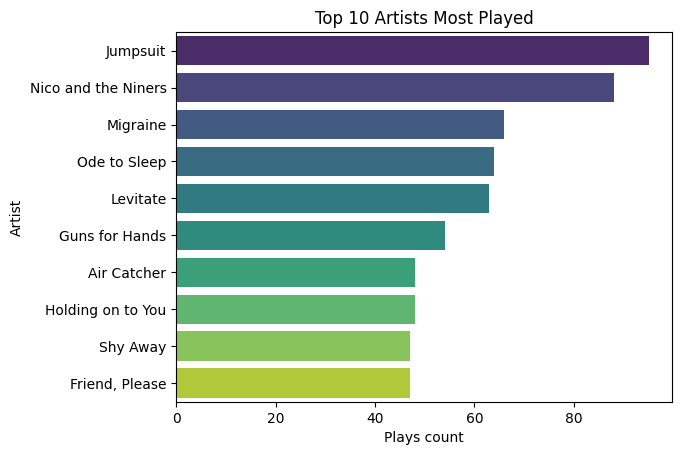

In [126]:
music_top_2023 = data_2023[data_2023['artistName'] == 'Twenty One Pilots']
music_top_2023_counts = music_top_2023['trackName'].value_counts().head(10)
plt.title("Top 10 Twenty One Pilots Track Most Played")
barTopArtist(music_top_2023_counts)